In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import copy

In [2]:
import seaborn as sns

sns.set_theme(style="white", font_scale=1, font="sans-serif", rc={'font.sans-serif': ['DejaVu Sans']})
sns.set_context("paper")

In [3]:
import json
qm_times = json.load(open('data/qm_timings.json'))
qm_timings = {key: qm_times[key]["acquisition"] for key in qm_times if key != "date"}

rfsoc_times = json.load(open('data/rfsoc_timings.json'))
rfsoc_timings = {key: rfsoc_times[key]["acquisition"] for key in rfsoc_times if key != "date"}

qblox_times = json.load(open('data/qblox_timings.json'))
qblox_timings = {key: qblox_times[key]["acquisition"] for key in qblox_times if key != "date"}

In [4]:
ideal_timings = {
    "resonator spectroscopy high power": 0.5734400000000001,
    "punchout": 6.88128,
    "resonator spectroscopy low power": 2.8672,
    "qubit spectroscopy": 14.745600000000001,
    "rabi amplitude": 92.78668800000001,
    "ramsey detuned": 37.1195904,
    "t1": 49.486233600000006,
    "ramsey": 40.83154944,
    "single shot classification": 3.02,
    "standard rb": 7.8,
}

In [5]:
zurich_timings = {
    "resonator spectroscopy high power": 3.560640335083008,
    "resonator spectroscopy low power": 5.412437438964844,
    "qubit spectroscopy": 18.080763816833496,
    "rabi amplitude": 97.05628323554993,
    "ramsey detuned": 106.30168008804321,
    "t1": 67.69457149505615,
    "ramsey": 48.1392548084259,
    "single shot classification": 9.503018379211426,
    "standard rb": 512.6062188148499,
}

In [6]:
exclude = {"punchout", "resonator punchout"}
ideal = {key: ideal_timings[key] for key in ideal_timings if key not in exclude}
zurich = {key: zurich_timings[key] for key in zurich_timings if key not in exclude}
rfsoc = {key: rfsoc_timings[key] for key in rfsoc_timings if key not in exclude}
qm = {key: qm_timings[key] for key in qm_timings if key not in exclude} 
qblox = {key: qblox_timings[key] for key in qblox_timings if key not in exclude} 

In [7]:
instruments = [("Ideal", ideal, "#072448"),
               ("ZI", zurich, "#54d2d2"),
               ("RFSoC", rfsoc, "#ffcb00"),
               ("QM", qm, "#f8aa4b"),
               ("QBlox", qblox, "#ff6150"),
              ]

names = [
    "Resonator spectroscopy\n(20 points)",
    "Resonator spectroscopy\n(100 points)",
    "Qubit spectroscopy\n(300 points)",
    "Rabi amplitude\n(75 points)",
    "Ramsey detuned\n(30 points)",
    "T1 experiment\n(40 points)",
    "T2 experiment\n(32 points)",
    "Single shot classification",
    "Standard RB"
]

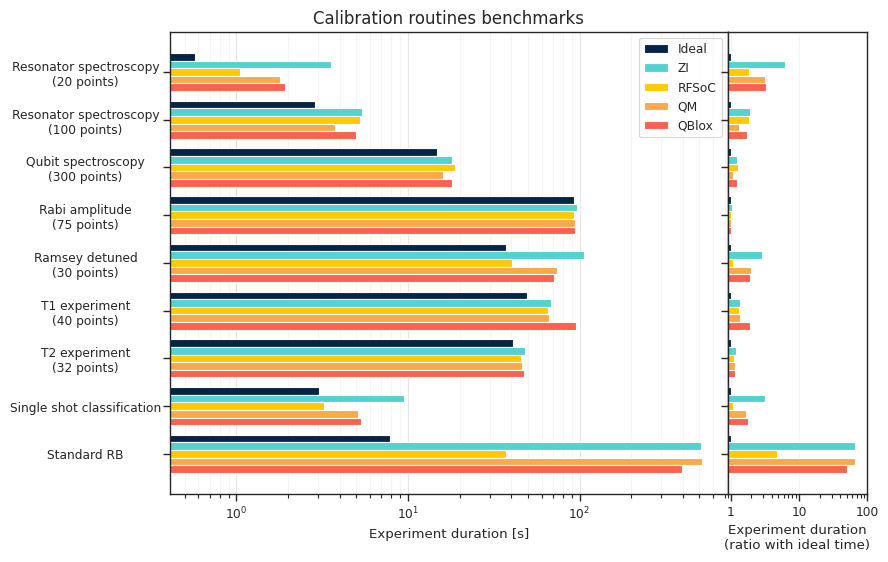

In [11]:
barWidth = 0.4

fig, axes = plt.subplots(1, 2, figsize =(9, 9*8/12), width_ratios=[0.8, 0.2], sharey=True)

plt.subplots_adjust(wspace=0, hspace=0)
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

ax = axes[0]

# Example data
experiments = names

positions = []
for ins in instruments:
    if len(positions) == 0:
        pos = np.arange(len(ins[1].keys()))*2.5
    else:
        pos = [x + barWidth for x in positions[-1]]
    positions.append(pos)


for idx, ins in enumerate(instruments):
    ax.barh(positions[idx], list(ins[1].values()), height=barWidth, color=ins[2], label=ins[0])


ax.set_yticks(positions[0]+barWidth*2, labels=experiments, horizontalalignment='center', position=(-0.13,0))
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Experiment duration [s]')

ax.set_axisbelow(True)

major_ticks = np.arange(0, 120, 20)
minor_ticks = np.arange(0, 120, 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', axis='x', alpha=0.2)
ax.grid(which='major', axis='x', alpha=0.5)

ax.legend()


real_instruments = copy.deepcopy(instruments)
for jdx, inst in enumerate(real_instruments):
    for idx, el in enumerate(inst[1]):
        inst[1][el] /= instruments[0][1][el]


barWidth = 0.4

# Example data
experiments = names

positions = []
for ins in real_instruments:
    if len(positions) == 0:
        pos = np.arange(len(ins[1].keys()))*2.5
    else:
        pos = [x + barWidth for x in positions[-1]]
    positions.append(pos)


for idx, ins in enumerate(real_instruments):
    axes[1].barh(positions[idx], list(ins[1].values()), height=barWidth, color=ins[2], label=ins[0])

    
axes[1].set_xlabel('Experiment duration\n(ratio with ideal time)')
axes[1].set_axisbelow(True)

axes[0].set_title("Calibration routines benchmarks", fontsize=12)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[1].set_xlim(0.9)

major_ticks = [1, 10, 100]
axes[1].set_xticks(major_ticks, labels=[str(i) for i in major_ticks], minor=False)
axes[1].grid(which='major', axis='x', alpha=0.2)

plt.savefig("benchmark_full.pdf",
            bbox_inches ="tight")
plt.show()